# Weather Data Analysis

**Introduction:**

This project delves into a diverse weather dataset using Python and data analysis tools, seeking to unveil patterns and correlations within atmospheric data.

**Objectives:**

1. **Data Standardization:**
   - Uniformizing column names and addressing missing values for a cohesive dataset.

2. **Exploration:**
   - Unearthing unique dataset characteristics through exploratory data analysis.
   - Initiating an exploration into records associated with specific weather conditions.

3. **Visual Insights:**
   - Crafting visualizations to illuminate key aspects of humidity, wind speed, and temperature variables.
   - Revealing relationships between temperature and dew point through visualizations.

4. **Temporal Analysis:**
   - Analyzing temporal patterns by creating new dimensions—Year, Month, Day, and Hour.
   - Charting the average temperature over months to unveil seasonal fluctuations.

5. **Correlation Mapping:**
   - Constructing a correlation matrix and visualizing it through a heatmap for a comprehensive understanding of interrelationships.

6. **Wind Dynamics:**
   - Investigating wind speed dynamics via a histogram and a dynamic time series plot.

**This project aims to demystify meteorological data complexities through meticulous data analysis, revealing patterns and correlations that enhance our understanding of weather dynamics.**

In [1]:
#import important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
weather_data= pd.read_csv("Weather_Data.csv")

In [3]:
weather_data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [4]:
#Display basic information about the data
print("Data Information")
print(weather_data.info())

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None


In [5]:
#Display the basic statistics of the data

weather_data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [6]:
#Renaming column for consistency
weather_data.rename(columns={'Rel Hum_%': 'Humidity', 'Weather': 'Weather_condition'}, inplace=True)

In [7]:
#checking for missing values in each column
print(weather_data.isnull().sum())

#checking if there are any missing value in the entire DataFrame
print(weather_data.isnull().any().any())

Date/Time            0
Temp_C               0
Dew Point Temp_C     0
Humidity             0
Wind Speed_km/h      0
Visibility_km        0
Press_kPa            0
Weather_condition    0
dtype: int64
False


### Exploratory Data Analysis

In [8]:
weather_data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Humidity',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather_condition'],
      dtype='object')

In [9]:
#data exploration
print("\nNumber of unique values in each column:")
print(weather_data.nunique())
print("\nUnique weather conditions:")
print(weather_data["Weather_condition"].unique())


Number of unique values in each column:
Date/Time            8784
Temp_C                533
Dew Point Temp_C      489
Humidity               83
Wind Speed_km/h        34
Visibility_km          24
Press_kPa             518
Weather_condition      50
dtype: int64

Unique weather conditions:
['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly Clear' 'Snow Showers' 'Snow' 'Clear'
 'Freezing Rain,Fog' 'Freezing Rain' 'Freezing Drizzle' 'Rain,Snow'
 'Moderate Snow' 'Freezing Drizzle,Snow' 'Freezing Rain,Snow Grains'
 'Snow,Blowing Snow' 'Freezing Fog' 'Haze' 'Rain,Fog' 'Drizzle,Fog'
 'Drizzle' 'Freezing Drizzle,Haze' 'Freezing Rain,Haze' 'Snow,Haze'
 'Snow,Fog' 'Snow,Ice Pellets' 'Rain,Haze' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Rain Showers,Fog' 'Thunderstorms' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Rain Showers,Fog'
 'Rain Showers,Snow Showers' 'Snow Pellets' 'Rai

In [10]:
#count of each weather condition
print("\nCount of each weather condition:")
print(weather_data["Weather_condition"].value_counts())


Count of each weather condition:
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezi

In [11]:
#show all records where weather condition is "clear"
print("\nRecords where weather condition is  Clear:")
print(weather_data[weather_data["Weather_condition"]=='Clear'])


Records where weather condition is  Clear:
             Date/Time  Temp_C  Dew Point Temp_C  Humidity  Wind Speed_km/h  \
67      1/3/2012 19:00   -16.9             -24.8        50               24   
114     1/5/2012 18:00    -7.1             -14.4        56               11   
115     1/5/2012 19:00    -9.2             -15.4        61                7   
116     1/5/2012 20:00    -9.8             -15.7        62                9   
117     1/5/2012 21:00    -9.0             -14.8        63               13   
...                ...     ...               ...       ...              ...   
8646   12/26/2012 6:00   -13.4             -14.8        89                4   
8698  12/28/2012 10:00    -6.1              -8.6        82               19   
8713   12/29/2012 1:00   -11.9             -13.6        87               11   
8714   12/29/2012 2:00   -11.8             -13.1        90               13   
8756  12/30/2012 20:00   -13.8             -16.5        80               24   

      V

# Data Visualisation

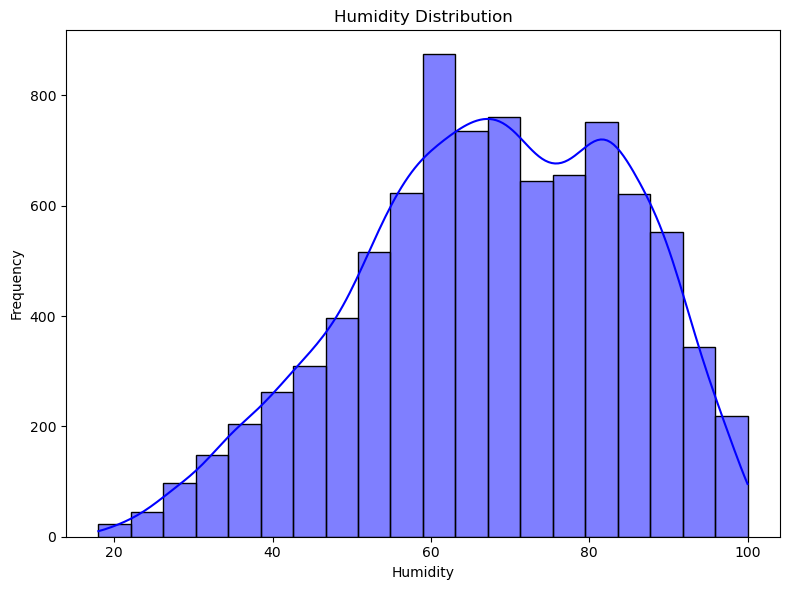

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(weather_data["Humidity"], bins=20, color="blue", kde=True)
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.title("Humidity Distribution")
plt.tight_layout()
plt.show()

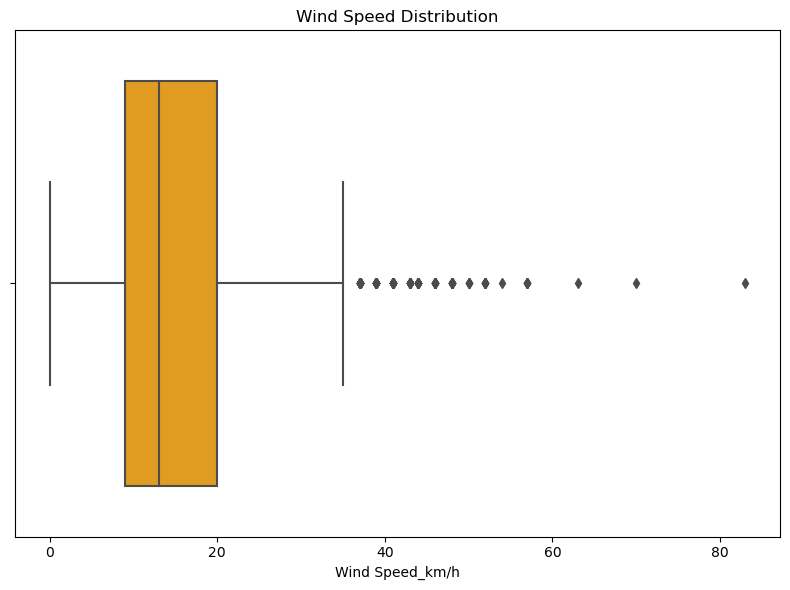

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x=weather_data["Wind Speed_km/h"], color="orange")
plt.xlabel("Wind Speed_km/h")
plt.title("Wind Speed Distribution")
plt.tight_layout()
plt.show()

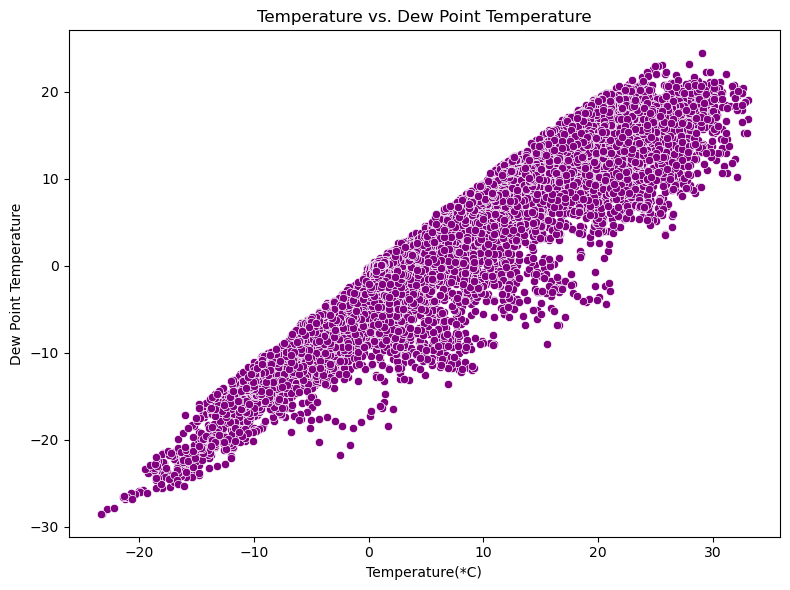

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C',data= weather_data, color="purple")
plt.xlabel("Temperature(*C)")
plt.ylabel("Dew Point Temperature")
plt.title("Temperature vs. Dew Point Temperature")
plt.tight_layout()
plt.show()

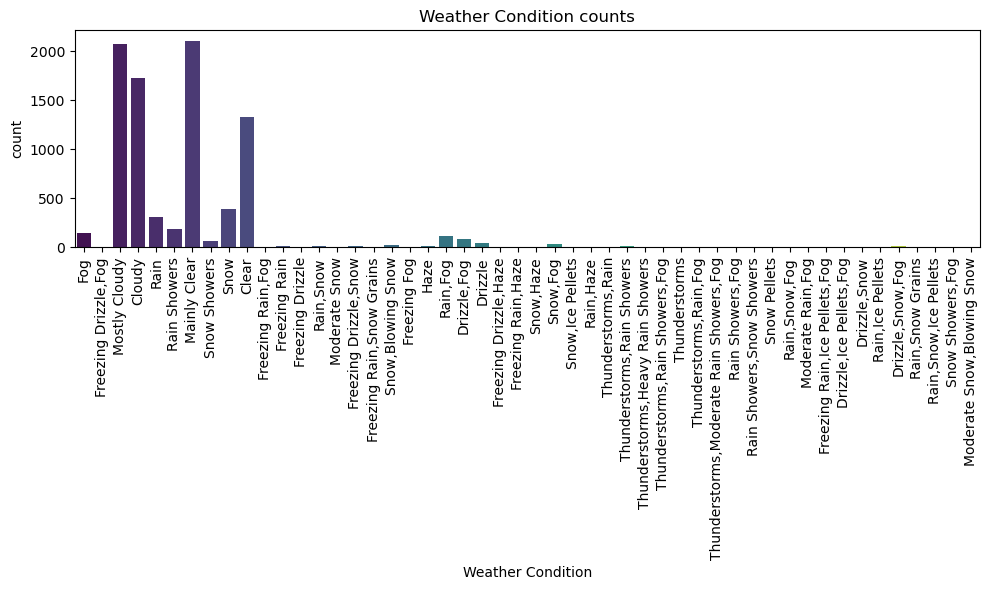

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x="Weather_condition", data=weather_data , palette="viridis")
plt.xlabel("Weather Condition")
plt.ylabel("count")
plt.title("Weather Condition counts")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Time-Based Analysis:

In [16]:
#convert 'Date-Time' column to datetime format
weather_data["Date/Time"] = pd.to_datetime(weather_data['Date/Time'])

In [17]:
#Extract and create new columns for Year, Month, Day and Hour
weather_data["Year"]= weather_data["Date/Time"].dt.year
weather_data["Month"]= weather_data["Date/Time"].dt.month
weather_data["Day"]= weather_data["Date/Time"].dt.day
weather_data["Hour"] = weather_data["Date/Time"].dt.hour

In [23]:
weather_data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Humidity',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather_condition',
       'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [26]:
weather_data = weather_data.drop(['Date/Time'],axis=1)

In [27]:
weather_data

,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition,Year,Month,Day,Hour
0,-1.8,-3.9,86,4,8.0,101.24,Fog,2012,1,1,0
1,-1.8,-3.7,87,4,8.0,101.24,Fog,2012,1,1,1
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012,1,1,2
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012,1,1,3
4,-1.5,-3.3,88,7,4.8,101.23,Fog,2012,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,Snow,2012,12,31,19
8780,0.2,-2.4,83,24,9.7,100.03,Snow,2012,12,31,20
8781,-0.5,-1.5,93,28,4.8,99.95,Snow,2012,12,31,21
8782,-0.2,-1.8,89,28,9.7,99.91,Snow,2012,12,31,22


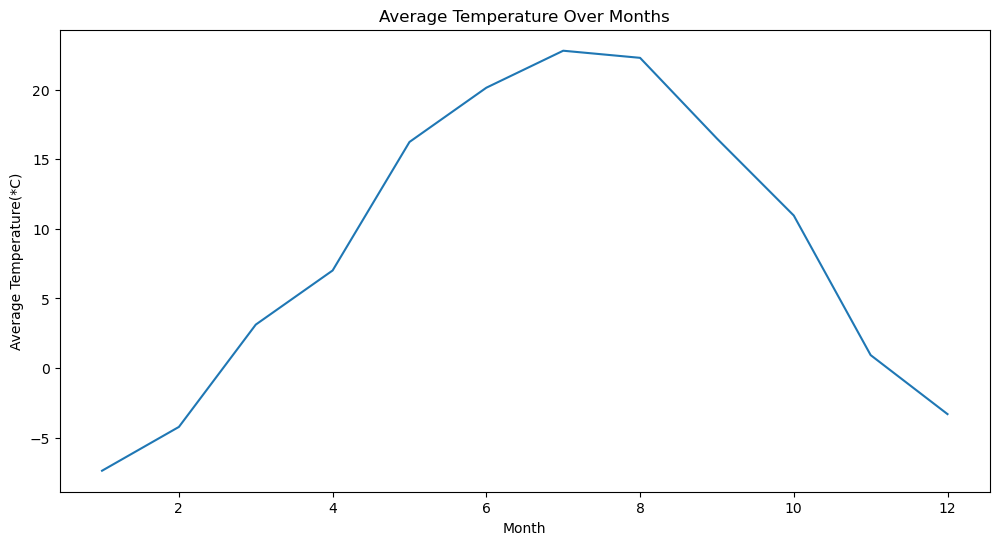

In [18]:
#plot average temperature over months
plt.figure(figsize=(12,6))
sns.lineplot(x="Month",y="Temp_C", data=weather_data.groupby('Month')['Temp_C'].mean().reset_index()) 
plt.title("Average Temperature Over Months")
plt.xlabel("Month")
plt.ylabel("Average Temperature(*C)" )
plt.sh   w()


### This plot shows higher temperatures in summer months and lower temperatures in winter months.

# Correlation Analysis:

In [19]:
#Check the ctual column names in the DataFrame
print(weather_data.columns)

#make sure column name is correct name is correct and without leading/trailing whitespace
column_name= "Weather_condition"
if column_name in weather_data.columns:
    data_encoded=pd.get_dummies(weather_data, columns=[column_name])
    correlation_matrix= data_encoded.corr()
    print(correlation_matrix)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Humidity',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather_condition',
       'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


C:\Users\DELL-INSPIRON\AppData\Local\Temp\ipykernel_12940\2499982808.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= data_encoded.corr()


                                                      Temp_C  \
Temp_C                                              1.000000   
Dew Point Temp_C                                    0.932714   
Humidity                                           -0.220182   
Wind Speed_km/h                                    -0.061876   
Visibility_km                                       0.273455   
Press_kPa                                          -0.236389   
Year                                                     NaN   
Month                                               0.218048   
Day                                                 0.009300   
Hour                                                0.106888   
Weather_condition_Clear                            -0.071162   
Weather_condition_Cloudy                           -0.035043   
Weather_condition_Drizzle                          -0.008464   
Weather_condition_Drizzle,Fog                      -0.005993   
Weather_condition_Drizzle,Ice Pellets,Fo

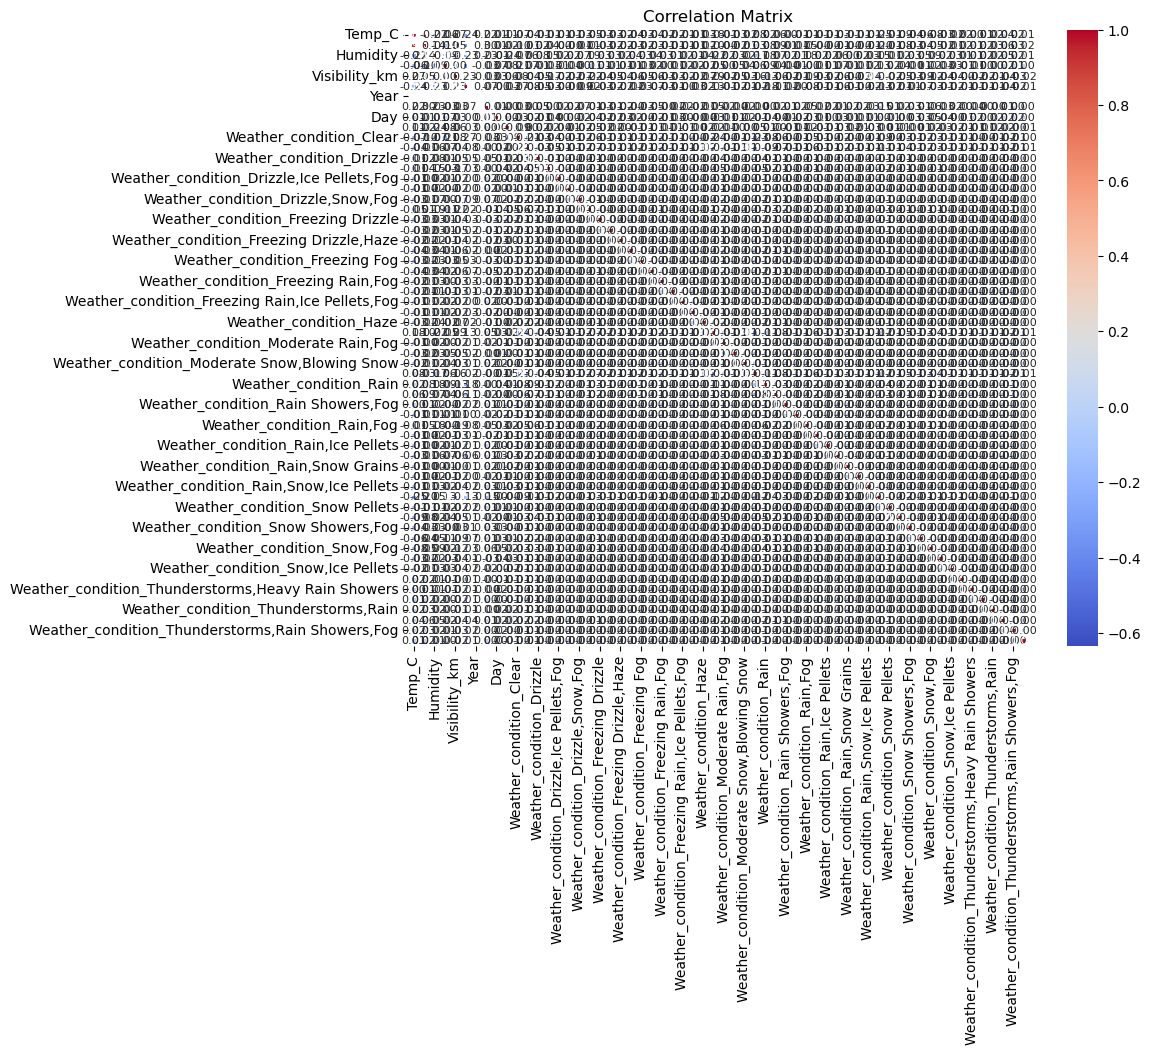

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=5, annot_kws={"size":8})
plt.title("Correlation Matrix")
plt.show()

### This correlation matrix can help identify relationship between diffrent weather variables.


# Wind Speed Analysis:

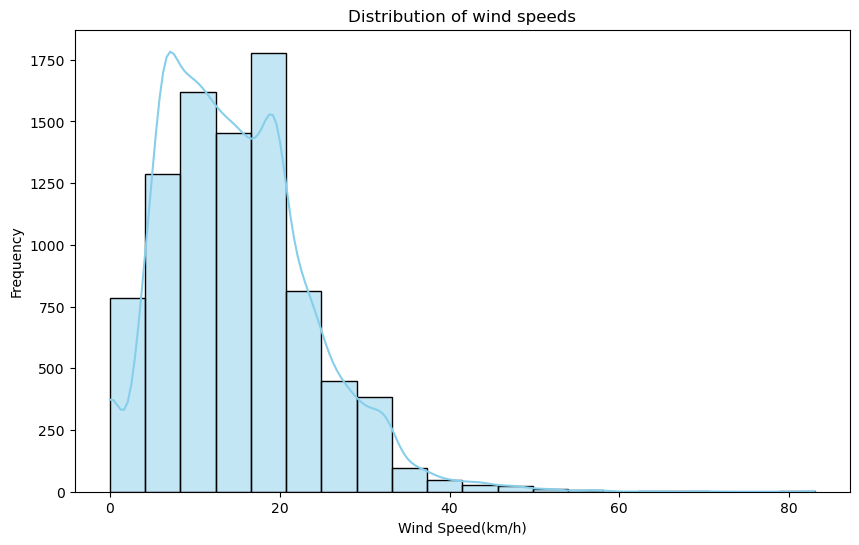

In [21]:
#plot a histogram of wind speeds
plt.figure(figsize=(10,6))
sns.histplot(weather_data["Wind Speed_km/h"], bins=20, color="skyblue", kde=True)
plt.title("Distribution of wind speeds")
plt.xlabel("Wind Speed(km/h)")
plt.ylabel("Frequency")
plt.show()

**`The histogram of wind speeds provides an overview of the frequency of different wind speeds. It shows the most of the time the wind speed is nearer to 20km/h.`**

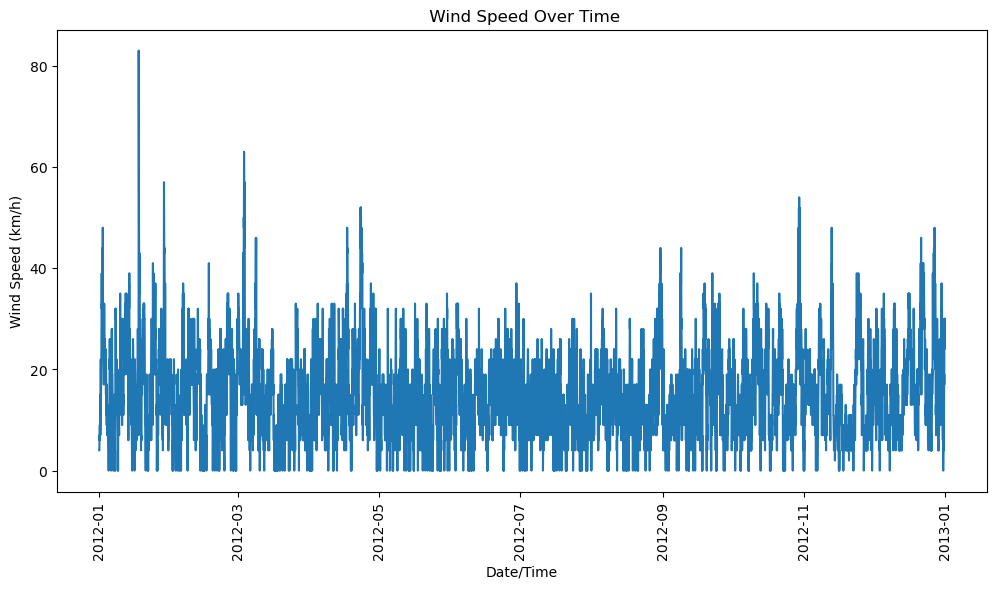

In [22]:
# plot wind speed over time
plt.figure(figsize=(12,6))
sns.lineplot(x="Date/Time", y="Wind Speed_km/h", data= weather_data)
plt.title(" Wind Speed Over Time")
plt.xlabel("Date/Time")
plt.ylabel("Wind Speed (km/h)")
plt.xticks(rotation=90)
plt.show()

### The line plot of wond speed over time can reveal trends or patterns in wind behaviour. Sudden spikes in wind speed indicate storms or turbulent weather periods.

# Conclusion: Insights from Weather Data Analysis

The weather data analysis project demonstrates a comprehensive exploration of weather-related information using Python and popular data analysis libraries such as pandas, seaborn, and matplotlib. The code is organized into distinct sections, each focusing on specific aspects of the dataset.

1. **Data Cleaning and Exploration:**
   - Columns are renamed for consistency.
   - Missing values are checked and confirmed to be absent.
   - Exploratory data analysis is performed to understand the dataset:
      - Unique values in each column are displayed.
      - Different weather conditions and their counts are presented.
      - Records specific to clear weather conditions are shown.

2. **Data Visualization:**
   - Several visualizations provide insights into the distribution and relationships within the dataset:
      - Humidity distribution is visualized using a histogram.
      - Wind speed distribution is displayed with a boxplot.
      - Scatter plot illustrates the relationship between temperature and dew point temperature.
      - A count plot shows the distribution of different weather conditions.

3. **Time-Based Analysis:**
   - The 'Date/Time' column is converted to a datetime format.
   - New columns for Year, Month, Day, and Hour are created.
   - Average temperature over months is plotted, revealing seasonal temperature patterns.

4. **Correlation Analysis:**
   - A correlation matrix is generated to identify relationships between different weather variables.
   - A heatmap visualization enhances the interpretation of correlations.

5. **Wind Speed Analysis:**
   - A histogram provides an overview of wind speed distribution.
   - A time series plot illustrates how wind speed varies over time.

**Key Findings:**
   - Seasonal temperature patterns are evident, with higher temperatures in summer months and lower temperatures in winter months.
   - The correlation matrix helps identify relationships between weather variables.
   - Wind speeds are generally around 20 km/h, as indicated by the histogram.

**Recommendations:**
   - Consider further analysis on specific weather conditions or events to gain deeper insights.
   - Explore additional external factors that may influence weather patterns.
   - Monitor wind speed trends for potential impact assessments.

**Overall, the project successfully explores, visualizes, and analyzes weather data, providing valuable insights into the dataset's characteristics and relationships between variables. Further refinement and in-depth analysis could enhance the understanding of specific weather patterns and trends.**